In [1]:
import matplotlib.pyplot as plt
import PIL
import numpy as np

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
path='../cat-dogs-data-np/'
sz=224

In [4]:
files = !ls {path}train/cat

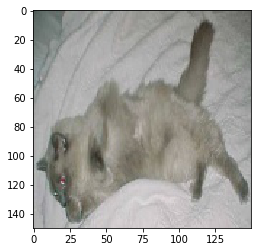

In [5]:
img=plt.imread(f'{path}train/cat/{files[1]}')
plt.imshow(img)

In [6]:
! rm -rf {path}tmp
! ls {path}

Icon?       train       x_test.npy  y_test.npy
models      valid       x_train.npy y_train.npy


In [ ]:
arch=resnet34
data = ImageClassifierData.from_paths(path, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.1, 3,cycle_len=1,cycle_mult=2)

 81%|████████▏ | 13/16 [03:28<00:48, 16.06s/it]

In [8]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 94%|█████████▍| 30/32 [00:01<00:00, 22.29it/s, loss=9.39] 


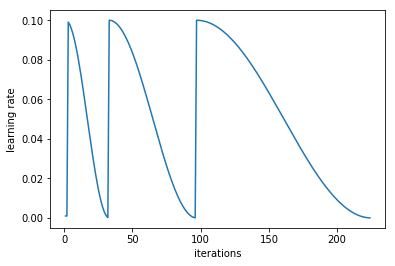

In [36]:
learn.sched.plot_lr()

In [33]:
learn.sched.plot()

AttributeError: 'CosAnneal' object has no attribute 'plot'

In [11]:
learn.fit(0.1,3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[0.      0.14242 0.0482  0.98828]                          
[1.      0.13948 0.0694  0.98633]                          
[2.      0.13035 0.02229 0.99219]                          



In [23]:
data.classes

['cat', 'dog']

In [12]:
log_pred=learn.predict()

In [13]:
prob=np.exp(log_pred[:,1])
print (prob)

[0.      0.      0.      0.      0.      0.      0.      0.      0.00003 0.      0.      0.      0.
 0.00049 0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.00001 0.
 0.      0.      0.      0.      0.      0.00001 0.00004 0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.05957 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.00001 0.      0.      0.      0.      0.      0.      0.      0.00171 0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.      0.00007
 0.      0.      0.      0.      0.      0.00001 0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.00001 0.      0.      0.23004 0.      0.      0.      0.      0.      0.      0.
 0.      0.00001 0.      0.      0.      0.00008 0.      0.      0.      0.      0.      0.    

In [14]:
def load_img(ix,ds=data.val_ds.fnames):
    img=plt.imread(f'{path}{ds[ix]}')
    return img

In [15]:
def plots(data,idxs):
    cols=min(len(idxs),4)
    f,ax=plt.subplots(1,cols,figsize=(20,10))
    imgs=[load_img(ix) for ix in idxs]
    for i in range(cols):
        ax[i].axis('off')
        ax[i].imshow(imgs[i])

In [16]:
def random_imgs(data):
    idxs=np.random.choice(len(data.val_ds.fnames),4,replace=False)
    plots(data,idxs)
    

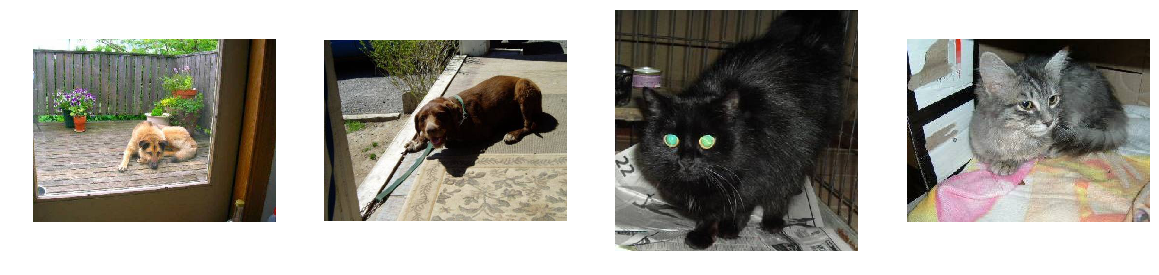

In [17]:
random_imgs(data)

In [18]:
def with_label(data,lab):
    # Label 1:dog and 0:cat
    idxs=np.random.choice(np.where(data.val_y==lab)[0],4,replace=False)
    plots(data,idxs)

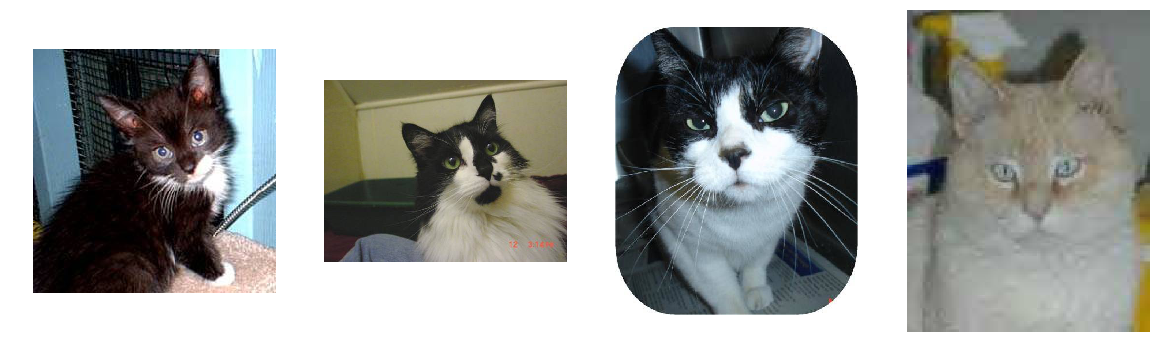

In [19]:
with_label(data,0)

In [20]:
val_labels=np.argmax(log_pred,axis=1)

In [21]:
def correctly_class(data):
    idxs=np.random.choice(np.where(data.val_y==val_labels)[0],4,replace=False)
    plots(data,idxs)

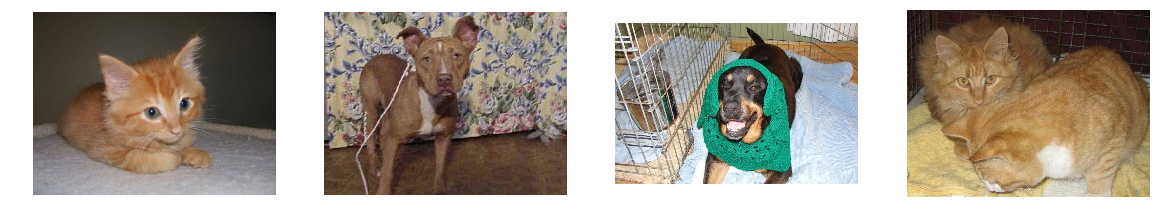

In [22]:
correctly_class(data)

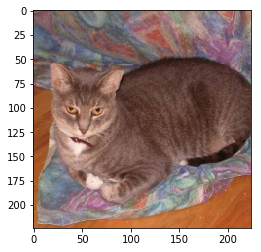

In [30]:
plt.imshow(data.val_ds.denorm(data.val_ds[3][0])[0])